In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# Import Dataset
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Bucket APPLICATION_TYPE
application_counts = application_df["APPLICATION_TYPE"].value_counts()

# Determine which values to replace if counts are less than 500
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")

# Bucket CLASSIFICATION
classification_counts = application_df["CLASSIFICATION"].value_counts()

# Determine which values to replace if counts are less than 1800
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

# Generate our categorical variable lists
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)

In [6]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# number of layer1 neurons = 2*(number of inputs=43) = 86 ~ 80
hidden_nodes_layer1 = 80
# number of layer2 neurons: Between (input=80) and (output=1 - classifier)
hidden_nodes_layer2 = 30

nn_inc_epochs = tf.keras.models.Sequential()

In [9]:
# First hidden layer
nn_inc_epochs.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_inc_epochs.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_inc_epochs.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_inc_epochs.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
nn_inc_epochs.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Increasing number of epochs
fit_model_inc_epochs = nn_inc_epochs.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 965us/step - loss: 0.5325 - accuracy: 0.7400
Epoch 2/200
804/804 [==============================] - 1s 972us/step - loss: 0.5322 - accuracy: 0.7406
Epoch 3/200
804/804 [==============================] - ETA: 0s - loss: 0.5329 - accuracy: 0.7402 ETA: 0s - loss: 0.5346 - accuracy:  - 1s 992us/step - loss: 0.5328 - accuracy: 0.7400
Epoch 4/200
804/804 [==============================] - 1s 989us/step - loss: 0.5327 - accuracy: 0.74010s - loss: 0.5504 - accura - ETA: 0s - loss: 0.5370 - accura - ETA: 0s - loss: 0.5358 - accuracy
Epoch 5/200
804/804 [==============================] - 1s 964us/step - loss: 0.5320 - accuracy: 0.7406
Epoch 6/200
804/804 [==============================] - 1s 955us/step - loss: 0.5323 - accuracy: 0.7406
Epoch 7/200
804/804 [==============================] - 1s 978us/step - loss: 0.5325 - accuracy: 0.7404
Epoch 8/200
804/804 [==============================] - 1s 978us/step - loss: 0.5320 - accuracy: 0.7397


804/804 [==============================] - 1s 909us/step - loss: 0.5316 - accuracy: 0.74020s - loss: 0.5337 - ac
Epoch 77/200
804/804 [==============================] - 1s 927us/step - loss: 0.5318 - accuracy: 0.7403
Epoch 78/200
804/804 [==============================] - 1s 944us/step - loss: 0.5318 - accuracy: 0.7406
Epoch 79/200
804/804 [==============================] - 1s 960us/step - loss: 0.5320 - accuracy: 0.7406
Epoch 80/200
804/804 [==============================] - 1s 933us/step - loss: 0.5329 - accuracy: 0.7401
Epoch 81/200
804/804 [==============================] - 1s 929us/step - loss: 0.5325 - accuracy: 0.74060s - loss: 0.5303 
Epoch 82/200
804/804 [==============================] - 1s 932us/step - loss: 0.5319 - accuracy: 0.7397
Epoch 83/200
804/804 [==============================] - 1s 936us/step - loss: 0.5387 - accuracy: 0.7402
Epoch 84/200
804/804 [==============================] - 1s 927us/step - loss: 0.5320 - accuracy: 0.7404
Epoch 85/200
804/804 [===============

804/804 [==============================] - 1s 934us/step - loss: 0.5315 - accuracy: 0.7406
Epoch 151/200
804/804 [==============================] - 1s 913us/step - loss: 0.5316 - accuracy: 0.7410
Epoch 152/200
804/804 [==============================] - 1s 930us/step - loss: 0.5314 - accuracy: 0.7409
Epoch 153/200
804/804 [==============================] - 1s 917us/step - loss: 0.5319 - accuracy: 0.7407
Epoch 154/200
804/804 [==============================] - 1s 945us/step - loss: 0.5315 - accuracy: 0.7404
Epoch 155/200
804/804 [==============================] - 1s 926us/step - loss: 0.5314 - accuracy: 0.7409
Epoch 156/200
804/804 [==============================] - 1s 942us/step - loss: 0.5317 - accuracy: 0.7407
Epoch 157/200
804/804 [==============================] - 1s 972us/step - loss: 0.5319 - accuracy: 0.7403
Epoch 158/200
804/804 [==============================] - 1s 896us/step - loss: 0.5413 - accuracy: 0.7408
Epoch 159/200
804/804 [==============================] - 1s 942us/ste

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_inc_epochs.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6200 - accuracy: 0.7346
Loss: 0.620000422000885, Accuracy: 0.7345772385597229


# Changing activation function from relu to tanh

In [15]:
# Changing Activation Function: try tanh to handle negative inputs in X_train_scaled
nn_tanh = tf.keras.models.Sequential()

In [16]:
# First hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn_tanh.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_tanh.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn_tanh.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
fit_model_tanh = nn_tanh.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 993us/step - loss: 0.5707 - accuracy: 0.7196
Epoch 2/100
804/804 [==============================] - 1s 999us/step - loss: 0.5580 - accuracy: 0.72790s - los
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5546 - accuracy: 0.7271
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7282
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7307
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7311
Epoch 7/100
804/804 [==============================] - 1s 928us/step - loss: 0.5488 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7318
Epoch 10/100
804/804 [==============================] - 1s 947us/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7393
Epoch 79/100
804/804 [==============================] - 1s 962us/step - loss: 0.5353 - accuracy: 0.7398
Epoch 80/100
804/804 [==============================] - 1s 923us/step - loss: 0.5351 - accuracy: 0.7393
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7395
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7386
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7389
Epoch 84/100
804/804 [==============================] - 1s 982us/step - loss: 0.5349 - accuracy: 0.7397
Epoch 85/100
804/804 [==============================] - 1s 949us/step - loss: 0.5348 - accuracy: 0.73990s - los
Epoch 86/100
804/804 [==============================] - 1s 925us/step - loss: 0.5348 - accuracy: 0.7393
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_tanh.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5524 - accuracy: 0.7326
Loss: 0.5524094104766846, Accuracy: 0.7325947284698486


# Reducing Number of Input Features with additional binning and removing redundant columns

In [23]:
# Reducing Number of Input Features
# "SPECIAL_CONSIDERATIONS_N" and "SPECIAL_CONSIDERATIONS_Y" are dedundant, drop "SPECIAL_CONSIDERATIONS_N"
# Bin categorical columns with more than 5 unique values
# Re-read data
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [24]:
# Drop non-essential columns
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

# Bucket "APPLICATION_TYPE"
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")

# Bucket "CLASSIFICATION"
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

In [25]:
# Look at INCOME_AMT value counts for bucketing
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [26]:
# Determine which values to replace if counts are less than 3000
replace_income = list(income_counts[income_counts < 3000].index)

# Replace in dataframe
for income in replace_income:
    application_df["INCOME_AMT"] = application_df["INCOME_AMT"].replace(income, "Other")
    
# Check to make sure bucketing was successful
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [27]:
# Look at AFFILIATION value counts for bucketing
aff_counts = application_df["AFFILIATION"].value_counts()
aff_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [28]:
# Determine which values to replace if counts are less than 15000
replace_aff = list(aff_counts[aff_counts < 15000].index)

# Replace in dataframe
for aff in replace_aff:
    application_df["AFFILIATION"] = application_df["AFFILIATION"].replace(aff, "Other")
    
# Check to make sure bucketing was successful
application_df["AFFILIATION"].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [29]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

In [30]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)

In [31]:
# Drop "SPECIAL_CONSIDERATION_N":
application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_reduced_input = tf.keras.models.Sequential()

# First hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_reduced_input.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_reduced_input.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                2800      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model
nn_reduced_input.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model_reduced_input = nn_reduced_input.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 993us/step - loss: 0.5717 - accuracy: 0.7193
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5590 - accuracy: 0.7276: 0s - loss: 0.5594 - accuracy: 0.72
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7290
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7299
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7317
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7294
Epoch 7/100
804/804 [==============================] - 1s 914us/step - loss: 0.5504 - accuracy: 0.73230s - loss: 0.5541 - accu
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5513 - accuracy: 0.7312
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7302: 0s - l
Epoch 10/100
804/80

Epoch 77/100
804/804 [==============================] - 1s 984us/step - loss: 0.5390 - accuracy: 0.73830s - loss:
Epoch 78/100
804/804 [==============================] - 1s 992us/step - loss: 0.5384 - accuracy: 0.7377
Epoch 79/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7382: 0s - loss: 0.5404 - ac
Epoch 80/100
804/804 [==============================] - ETA: 0s - loss: 0.5384 - accuracy: 0.73 - 1s 932us/step - loss: 0.5387 - accuracy: 0.7376
Epoch 81/100
804/804 [==============================] - 1s 906us/step - loss: 0.5384 - accuracy: 0.7392
Epoch 82/100
804/804 [==============================] - 1s 946us/step - loss: 0.5382 - accuracy: 0.73900s - loss: 0.5314 - 
Epoch 83/100
804/804 [==============================] - 1s 973us/step - loss: 0.5385 - accuracy: 0.7385
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7391
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_reduced_input.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5613 - accuracy: 0.7269
Loss: 0.5613309144973755, Accuracy: 0.7268804907798767


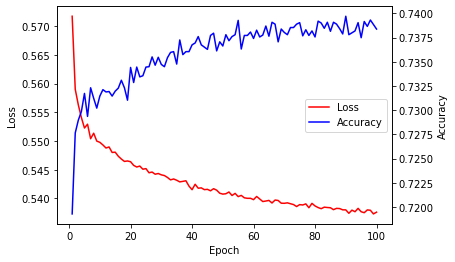

In [39]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model_reduced_input.history,
                          index=range(1, len(fit_model_reduced_input.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [41]:
# Export and save model to HDF5 file
nn_reduced_input.save("AlphabetSoupCharity_Optimization.h5")